In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

In [3]:
print(X.shape)

(150, 4)


In [4]:
X_mean = np.mean(X, axis = 0)
X_std = np.std(X,axis=0)
X_stdzd = (X-X_mean)/X_std

In [5]:
cov_matrix = np.cov(X_stdzd.T)
print(cov_matrix)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [6]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_matrix)
print(f"Eigen values:  {eigen_vals}")
print(f"Eigen vectors: {eigen_vecs}")

Eigen values:  [2.93808505 0.9201649  0.14774182 0.02085386]
Eigen vectors: [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [7]:
# sort eigen values and vectors
sorted_idx = np.argsort(eigen_vals)[::-1]

eig_vals = eigen_vals[sorted_idx]
eigen_vecs = eigen_vecs[:, sorted_idx]

In [8]:
total_variance = np.sum(eig_vals)
explained_variance = eig_vals
explained_variance_ratio = eig_vals / total_variance
cumulative_variance = np.cumsum(explained_variance_ratio)

print("Eigenvalues (variance per PC): ", explained_variance)
print("Eigenvalues (variance ratio per PC): ", explained_variance_ratio)
print("Cumulative Explained Variance: ", cumulative_variance)



Eigenvalues (variance per PC):  [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvalues (variance ratio per PC):  [0.72962445 0.22850762 0.03668922 0.00517871]
Cumulative Explained Variance:  [0.72962445 0.95813207 0.99482129 1.        ]


([<matplotlib.axis.XTick at 0x22004ade650>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

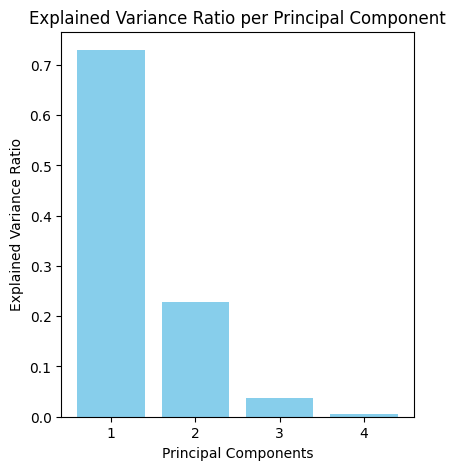

In [9]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.bar(range(1,5), explained_variance_ratio, color = "skyblue")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio per Principal Component")
plt.xticks([1,2,3,4])

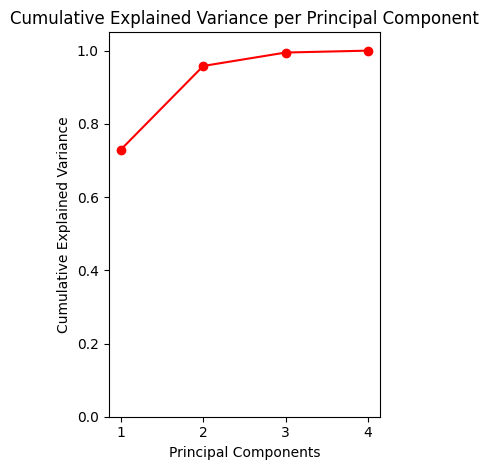

In [11]:
plt.subplot(1,2,2)
plt.plot(range(1,5),cumulative_variance,marker = "o", color = "red")
plt.xlabel("Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance per Principal Component")
plt.xticks([1,2,3,4])
plt.ylim(0,1.05)
plt.tight_layout()
plt.show()

In [12]:
W =  eigen_vecs[:, :2]  # Select the first two eigenvectors
X_pca = X_stdzd.dot(W)  # Project the data onto the new feature space

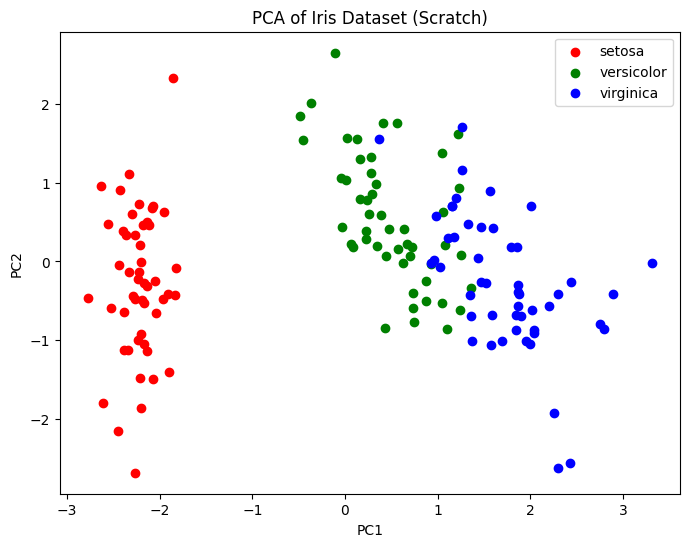

In [17]:
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']

for label, color in zip([0,1,2], colors):
    # use the single color for the current class
    plt.scatter(X_pca[y==label, 0], X_pca[y==label, 1], c=color, label=iris.target_names[label])

# set labels, title and show once
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Iris Dataset (Scratch)")
plt.legend()
plt.show()